<h1 style="font-size: 36px; text-align: center !important">Projet IA [Human For You]</h1>


# Livrable : 

## Livrable Technique - Présentation

---

## Groupe 04

| Membre           | Entreprise         | Contact               |
|------------------|--------------------|-----------------------------|
| LAGGOUNE Amine   | Cegid              | amine.laggoune@viacesi.com  |
| SACLIER Victor   | EDF                | victor.saclier@viacesi.com  |
| BOISSEL Arnaud   | Renault            | arnaud.boissel@viacesi.com  |


---

<center>
<img src='https://blog.integral-system.fr/wp-content/uploads/2020/02/33797061-1920x1359.jpg' />
</center>

---

### Date: [09/02/2024]



## Introduction

L'entreprise de produits pharmaceutiques HumanForYou basée en Inde emploie environ 4000 personnes. Cependant, chaque année elle subit un turn-over d'environ 15% de ses employés nécessitant de retrouver des profils similaires sur le marché de l'emploi.

La direction trouve que ce niveau de turn-over n'est pas bon pour l'entreprise car :

- Les projets sur lesquels étaient les employés quittant la société prennent du retard ce qui nuit à la réputation de l'entreprise auprès de ses clients et partenaires.

- Un service de ressources humaines de taille conséquente doit être conservé car il faut avoir les moyens de trouver les nouvelles recrues.

- Du temps est perdu à l'arrivée des nouveaux employés car ils doivent très souvent être formés et ont besoin de temps pour devenir pleinement opérationnels dans leur nouvel environnement.

La direction fait donc appel à nous, spécialistes de l'analyse de données, pour déterminer les facteurs ayant le plus d'influence sur ce taux de turn-over et leurs proposer des modèles afin d'avoir des pistes d'amélioration pour donner à leurs employés l'envie de rester.

---

## Objectifs

- Préparation de notre jeux de données.


- Etude des différents modèles d'apprentissage.


- Le choix du modèle retenu (Avec justification).


- Nos résultats finaux avec proposition de pistes d'amélioration.

---









---

<center>
© [FISA  A5 INFO], [2024]
</center>


In [156]:
# imports
import os
import numpy as np
from numpy.random import default_rng
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.metrics import roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit, GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
# on filtre les warnings
warnings.filterwarnings('ignore')

# stabilité du notebook d'une exécution à l'autre
random = default_rng(42)

# Ajustement des tailles des labels graphiques utilisé dans le notebook
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

Implementation des fonctions pour Importer, Lire et exporter les données de notre dataset

In [157]:
PROJECT_ROOT_DIR = "."
DATA_PATH = "datasets"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images") 

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


def load_data(path, filename):
    file_path = os.path.join(path, filename)
    return pd.read_csv(file_path)

### Import des données issue des datasets
- __employee_data__ : Cette variable va contenir les informations générales des employées.
- __employee_survey__ : Cette variable va contenir les informations d'enquêtes des employées.
- __manager_survey__ : Cette variable va contenir les informations d'enquêtes des managers.
- __in_time__ et __out_time__ : Ces deux variables vont contenir les données du pointage des employées, càd, le temps d'entrée et de sortie de chaque employée.

In [158]:
employee_data = load_data(DATA_PATH, 'general_data.csv')
employee_survey = load_data(DATA_PATH, 'employee_survey_data.csv')
manager_survey = load_data(DATA_PATH, 'manager_survey_data.csv')
in_time = load_data(DATA_PATH, 'in_time.csv')
out_time = load_data(DATA_PATH, 'out_time.csv')

# Analyse préliminaire
##  1- Analyse de données des horaires de travail

In [159]:
in_time.info()
out_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Columns: 262 entries, Unnamed: 0 to 2015-12-31
dtypes: float64(12), int64(1), object(249)
memory usage: 8.8+ MB


### 1.1Analyse du DataFrame `in_time`

### Structure Générale
- **Nombre d'Entrées (Lignes):** 4410
- **Nombre de Colonnes:** 262
- **Type de Données:** 
  - Numériques: `float64` (12 colonnes), `int64` (1 colonne)
  - Catégorielles/Textuelles: `object` (249 colonnes)



##  2- Analyse de données issue du service des ressources humaines

In [160]:
employee_data.head(1)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,JobLevel,JobRole,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,1,Healthcare Representative,Married,131160,1.0,Y,11,8,0,1.0,6,1,0,0


In [161]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

### 2.1 Analyse du DataFrame `employee_data`  

### Aperçu Général
- **Entrées (Lignes):** 4410
- **Colonnes:** 24
- **Type de Données:** 
  - Numériques: `int64` et `float64`
  - Catégorielles: `object`

### Gestion des Données Manquantes
- **Colonnes avec Données Manquantes:** 
  - `NumCompaniesWorked` <span style="color:red;">(19 valeurs manquantes)</span>
  - `TotalWorkingYears` <span style="color:red;">(9 valeurs manquantes)</span>


### Détails des Colonnes
- **Variables Numériques:** 
  - Exemples: `Age`, `DistanceFromHome`, `Education`, `MonthlyIncome`
- **Variables Catégorielles:** 
  - Exemples: `Attrition`, `BusinessTravel`, `Department`
 



##  2- Analyse de données évaluation du manager &  Enquête qualité de vie au travail

In [162]:
manager_survey.head(1)

,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3


In [163]:
employee_survey.head(1)

,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0


In [164]:
manager_survey.info()
employee_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   EmployeeID         4410 non-null   int64
 1   JobInvolvement     4410 non-null   int64
 2   PerformanceRating  4410 non-null   int64
dtypes: int64(3)
memory usage: 103.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   EmployeeID               4410 non-null   int64  
 1   EnvironmentSatisfaction  4385 non-null   float64
 2   JobSatisfaction          4390 non-null   float64
 3   WorkLifeBalance          4372 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 137.9 KB



## Structure Générale
- **Nombre d'Entrées (Lignes):** 4410
- **Nombre de Colonnes:** 4
- **Types de Données:**
  - `int64`: 1 colonne (`EmployeeID`)
  - `float64`: 3 colonnes (`EnvironmentSatisfaction`, `JobSatisfaction`, `WorkLifeBalance`)

## Détails des Colonnes
- **`EmployeeID` (Intégralité des Données Présentes):**
  - 4410 valeurs non-nulles, identifiant unique pour chaque employé.
- **`EnvironmentSatisfaction` (25 Valeurs Manquantes):**
  - 4385 valeurs non-nulles, évaluation de la satisfaction environnementale (float).
- **`JobSatisfaction` (20 Valeurs Manquantes):**
  - 4390 valeurs non-nulles, évaluation de la satisfaction professionnelle (float).
- **`WorkLifeBalance` (38 Valeurs Manquantes):**
  - 4372 valeurs non-nulles, évaluation de l'équilibre travail-vie personnelle (float).



# Conclusion de l'Analyse Préliminaire

## Observations Clés
- Les DataFrames `in_time` et `out_time` **ne contiennent pas de colonne `EmployeeID`**. Cependant, ils incluent une colonne `Unnamed` qui, après examen, semble faire référence à l'`EmployeeID`.

- **Présence de Valeurs 'NaN'** : Ces valeurs sont observées dans certaines variables et pourraient être interprétées comme des jours où les employés étaient absents.

## Prochaines Étapes
- **Calcul du Temps Moyen Passé en Entreprise** : L'objectif immédiat est de calculer la durée moyenne de présence des employés sur le lieu de travail.

- **Fusion des Données** : Après avoir calculé cette métrique, nous prévoyons de fusionner `in_time`, `out_time` et d'autres informations pertinentes dans **un seul et unique DataFrame**. Ce processus facilitera une analyse globale et détaillée des données des employés.



On fait une copie de `in_time` et `out_time`  pour eviter de modifier les originaux 

In [165]:
InTime_copy = in_time.copy()
OutTime_copy = out_time.copy()

In [166]:
InTime_copy.rename(columns={InTime_copy.columns[0]: 'EmployeeID'}, inplace=True)
OutTime_copy.rename(columns={OutTime_copy.columns[0]: 'EmployeeID'}, inplace=True)

In [167]:
for date in InTime_copy.columns[1:]:  # en supposant que la première colonne est EmployeeID
    InTime_copy[date] = pd.to_datetime(InTime_copy[date])
    OutTime_copy[date] = pd.to_datetime(OutTime_copy[date])

   

    InTime_copy[date] = (OutTime_copy[date] - InTime_copy[date]).dt.total_seconds() / 3600


In [168]:
InTime_copy.head()

,EmployeeID,2015-01-01,2015-01-02,2015-01-05,2015-01-06,2015-01-07,2015-01-08,2015-01-09,2015-01-12,2015-01-13,2015-01-14,2015-01-15,2015-01-16,2015-01-19,2015-01-20,...,2015-12-11,2015-12-14,2015-12-15,2015-12-16,2015-12-17,2015-12-18,2015-12-21,2015-12-22,2015-12-23,2015-12-24,2015-12-25,2015-12-28,2015-12-29,2015-12-30,2015-12-31
0,1,NaN,7.208333,7.189722,7.410833,7.006667,7.289722,7.484444,7.262778,7.831111,NaN,7.346944,7.267500,NaN,6.775833,...,7.651944,7.538889,NaN,7.551944,NaN,NaN,7.339167,7.395833,6.504722,7.596389,NaN,7.773889,7.315000,7.778889,7.080278
1,2,NaN,8.109167,7.454722,NaN,7.396944,7.416667,7.150833,7.611389,7.278889,NaN,7.613056,7.727500,7.577500,7.602778,...,7.458056,7.536111,7.435278,8.255278,7.928333,7.903056,7.753889,7.712222,7.435556,NaN,NaN,7.614722,7.982500,7.986111,8.227222
2,3,NaN,6.692500,7.265556,6.405278,6.765000,7.345000,6.861389,7.418611,6.999722,NaN,7.438333,7.210278,7.072222,6.920556,...,7.199444,7.096389,6.751111,6.902778,7.218333,6.785833,7.163611,6.801667,6.730278,6.849722,NaN,7.023889,7.438889,7.538889,6.786389
3,4,NaN,7.338333,7.291944,6.943056,6.919444,6.850833,7.193056,6.998611,7.306389,NaN,6.876667,6.907778,6.518611,7.178889,...,6.966667,7.055833,6.999444,7.313056,7.455833,7.629167,6.846667,7.326389,7.413611,7.085000,NaN,7.447222,7.416667,7.366389,7.133056
4,5,NaN,8.055556,7.988056,7.682500,7.806111,7.662222,7.721667,8.365000,8.257222,NaN,8.260000,8.403611,NaN,7.815278,...,8.695833,7.589444,8.193056,8.129444,8.320000,7.903611,7.665000,7.957500,7.786944,8.249444,NaN,7.662222,8.268611,7.953333,8.018056


In [169]:
# Calcul de la moyenne
average_presence = InTime_copy.iloc[:, 1:].mean(axis=1)
average_presence_df = pd.DataFrame({'EmployeeID': InTime_copy['EmployeeID'], 'AveragePresence': average_presence})

In [170]:
# Fusion avec general_data
merged_data_with_time = employee_data.merge(average_presence_df, on='EmployeeID')
merged_data_with_survey = merged_data_with_time.merge(manager_survey, on='EmployeeID')
general_dataset =  merged_data_with_survey.merge(employee_survey,on='EmployeeID')

In [171]:
general_dataset.info()
general_dataset.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4410 entries, 0 to 4409
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,PerformanceRating,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4410.000000,4385.000000,4390.000000,4372.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129,7.700792,2.729932,3.153741,2.723603,2.728246,2.761436
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327,1.340218,0.711400,0.360742,1.092756,1.101253,0.706245
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.950504,1.000000,3.000000,1.000000,1.000000,1.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000,6.673333,2.000000,3.000000,2.000000,2.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000,7.406761,3.000000,3.000000,3.000000,3.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000,8.368703,3.000000,3.000000,4.000000,4.000000,3.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000,11.030960,4.000000,4.000000,4.000000,4.000000,4.000000


On remarque aussi que certain collaborateur ont un post qui n'est pas en adéquation avec leur parcours scolaire. ce qui peu étres un paramétre intéressant à prendre en compte
c'est pour cela qu'on a pris soin de rajouter 

In [172]:
unique_job_roles = general_dataset['EducationField'].unique()
general_data_copy = general_dataset.copy()

compatibility_dict = {
    "Life Sciences": ["Healthcare Representative", "Laboratory Technician", "Research Scientist", "Research Director"],
    "Medical": ["Healthcare Representative", "Laboratory Technician", "Research Scientist", "Research Director"],
    "Marketing": ["Sales Executive", "Sales Representative"],
    "Technical Degree": ["Research Scientist", "Manufacturing Director", "Laboratory Technician"],
    "Human Resources": ["Human Resources"],
    "Other": ["Sales Executive", "Human Resources", "Research Scientist", "Manager"],
    
}
def check_compatibility(row):
    compatible_roles = compatibility_dict.get(row['EducationField'], [])
    if row['JobRole'] in compatible_roles:
        return 1
    return 0

general_data_copy['JobCompatibility'] = general_data_copy.apply(check_compatibility, axis=1)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EmployeeCount'}>,
        <AxesSubplot:title={'center':'EmployeeID'}>],
       [<AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'StandardHours'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title={'center':'TrainingTimesLastYear'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>,
        <AxesSubplot:title={'center':'YearsSinceLastPromotion'}>],
       [<AxesSubplot:title={'center':'YearsWithCurrManager'}>,
        <AxesSubplot:title={'center':'AveragePresence'}>,
        <AxesSubplot

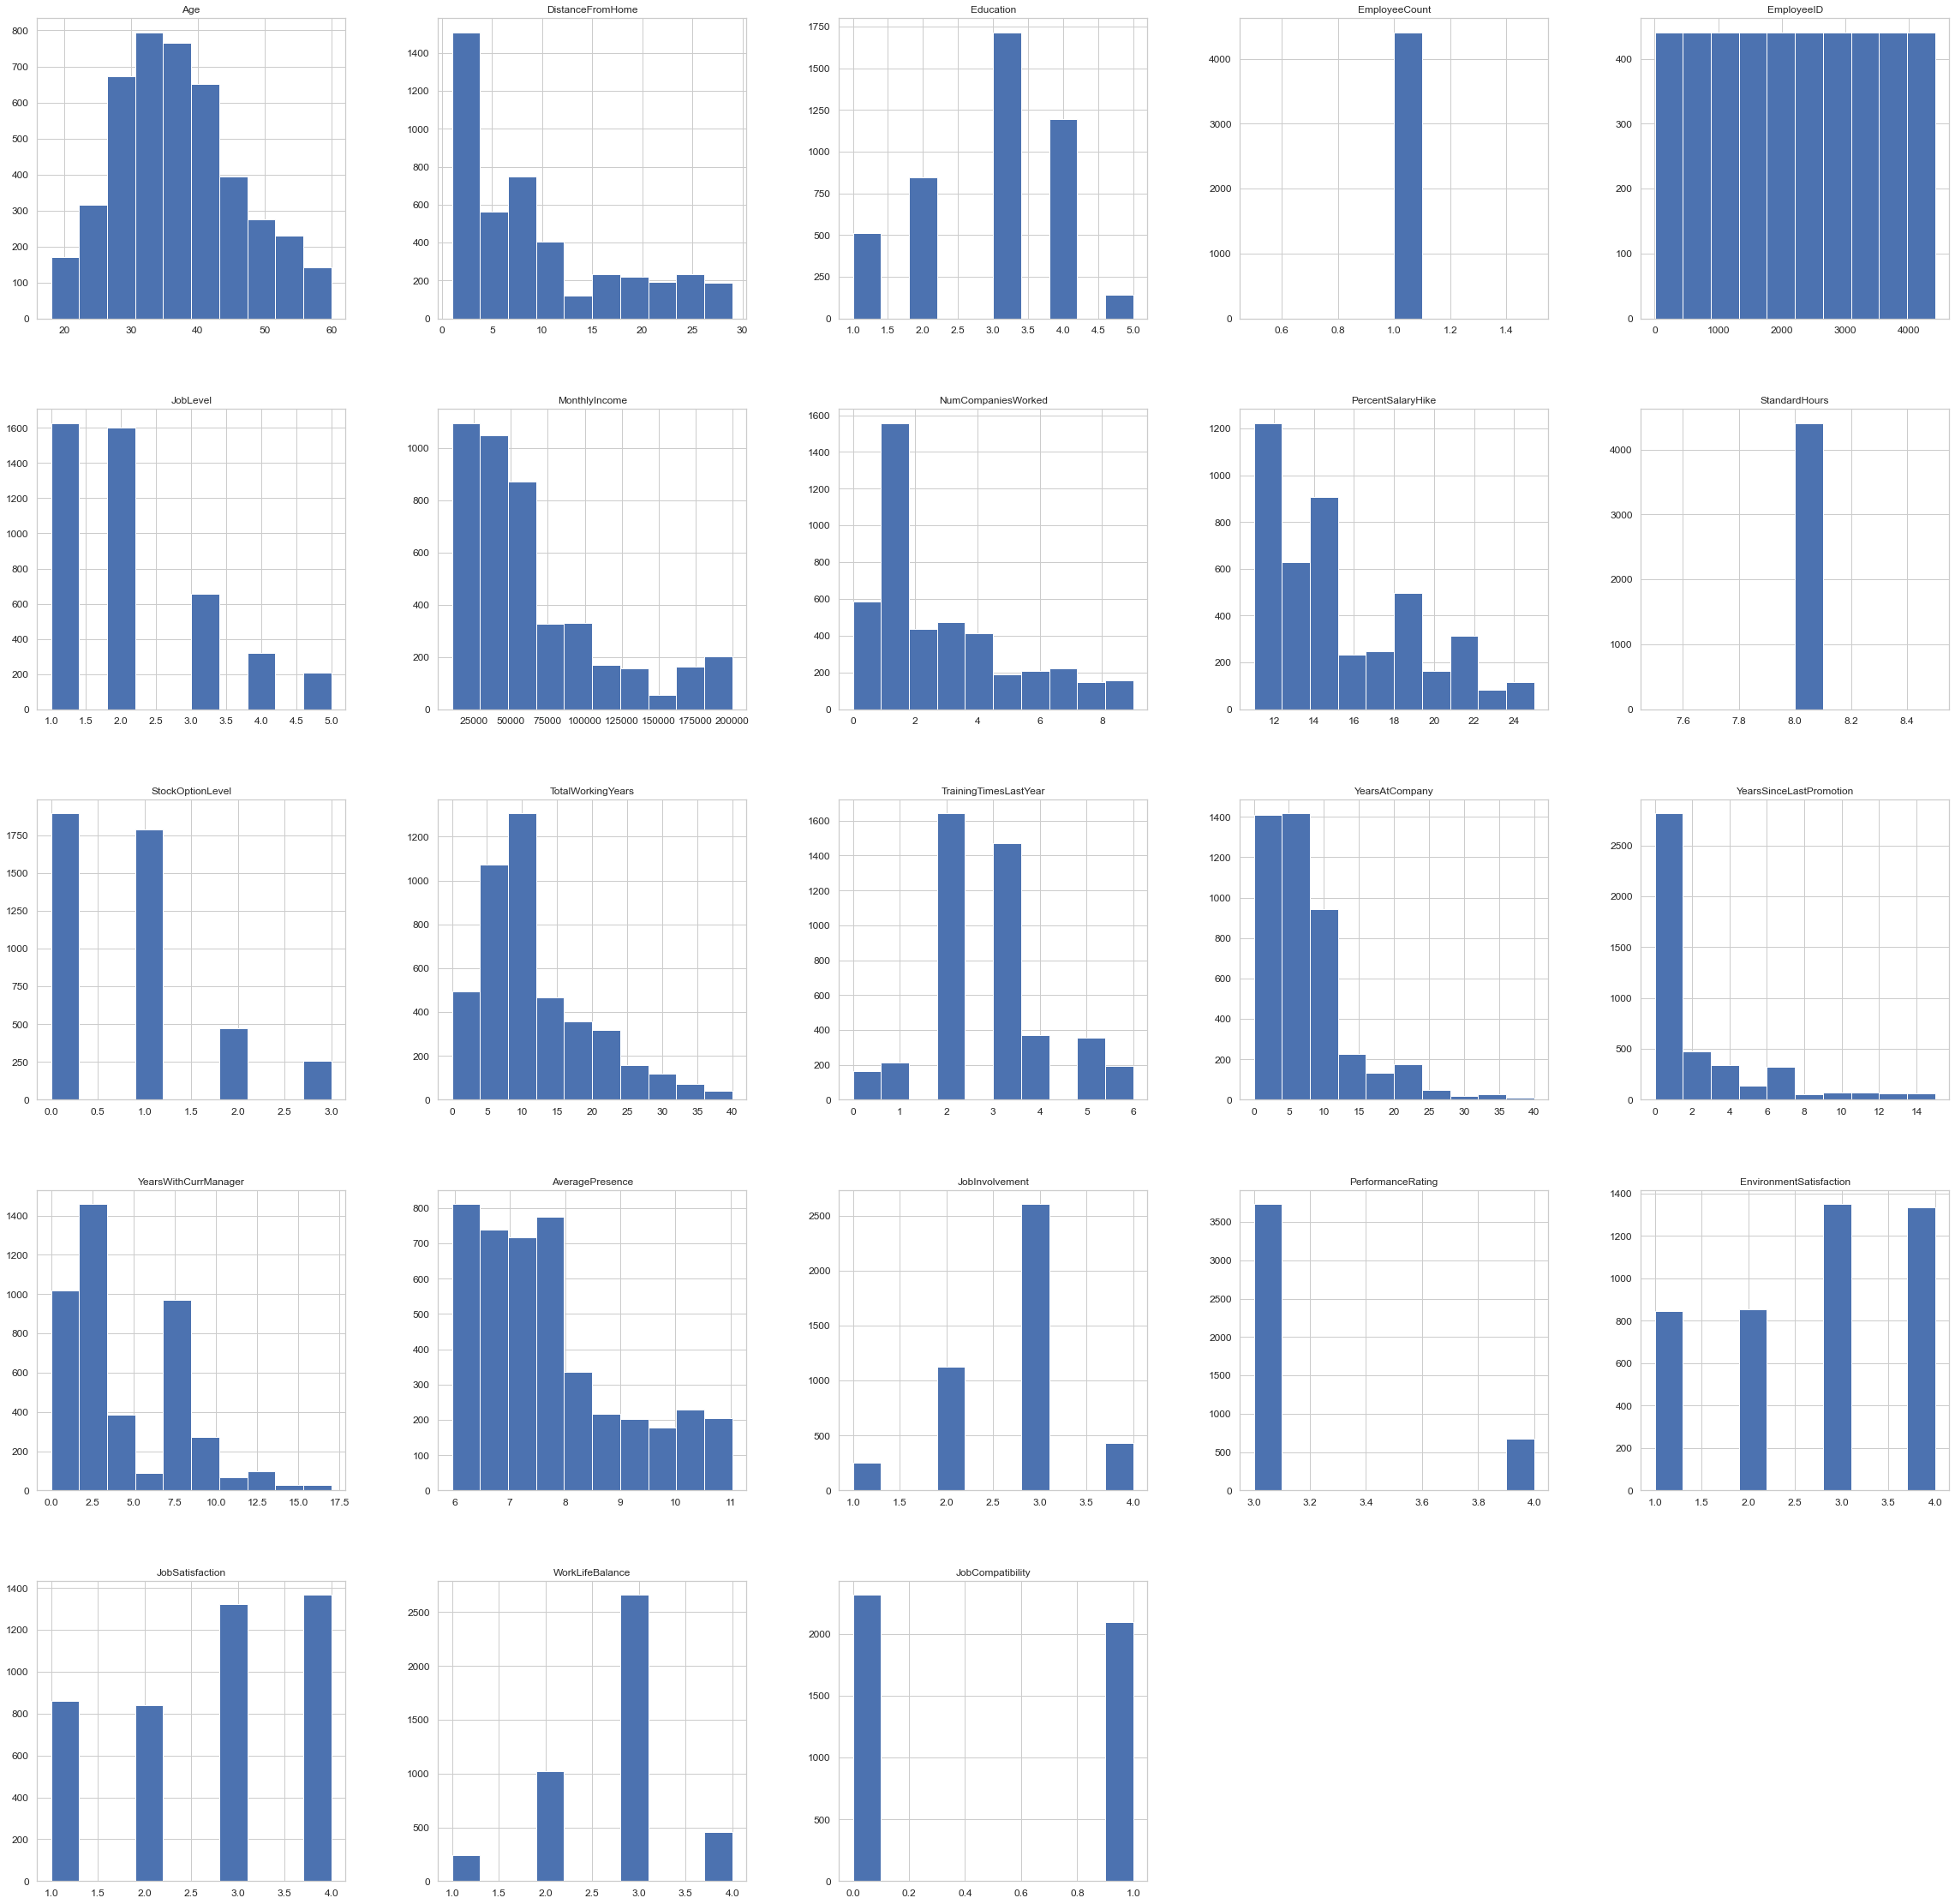

In [173]:
general_data_copy.hist(figsize=(40, 40))


On va également supprimer les attributs non pertinents, en l'occurence la colonne "PerformanceRating". Les données qu'elle contient ne sont pas pertinentes, ni utilisables dans le contexte de ce qu'elles doivent représenter

Certains attributs sont à supprimer, pour des raisons éthiques nous ne souhaitons pas qu'elles intérfèrent avec notre modèle final. Les raisons de ce choix sont développées dans le document associé à ce livrable.

In [174]:
# Identifier les colonnes avec des valeurs constantes
cols_to_drop = [col for col in general_data_copy.columns if general_data_copy[col].nunique() == 1]
# Supprimer ces colonnes du DataFrame
general_data_copy.drop(cols_to_drop, axis=1, inplace=True)

general_data_copy.drop(['EmployeeID', 'Age', 'Gender', 'MaritalStatus'], axis=1, inplace=True)
general_data_copy.drop(["PerformanceRating"], axis=1, inplace=True)
# Afficher les colonnes à supprimer
print(f"Colonnes à supprimer car elles contiennent des valeurs constantes : {cols_to_drop}")
general_data_copy.head()

Colonnes à supprimer car elles contiennent des valeurs constantes : ['EmployeeCount', 'Over18', 'StandardHours']


,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,JobLevel,JobRole,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,AveragePresence,JobInvolvement,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobCompatibility
0,No,Travel_Rarely,Sales,6,2,Life Sciences,1,Healthcare Representative,131160,1.0,11,0,1.0,6,1,0,0,7.373651,3,3.0,4.0,2.0,1
1,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,Research Scientist,41890,0.0,23,1,6.0,3,5,1,4,7.718969,2,3.0,2.0,4.0,1
2,No,Travel_Frequently,Research & Development,17,4,Other,4,Sales Executive,193280,1.0,15,3,5.0,2,5,0,3,7.013240,3,2.0,2.0,1.0,1
3,No,Non-Travel,Research & Development,2,5,Life Sciences,3,Human Resources,83210,3.0,11,3,13.0,5,8,7,5,7.193678,2,4.0,4.0,3.0,0
4,No,Travel_Rarely,Research & Development,10,1,Medical,1,Sales Executive,23420,4.0,12,2,9.0,2,6,0,4,8.006175,3,4.0,1.0,3.0,0


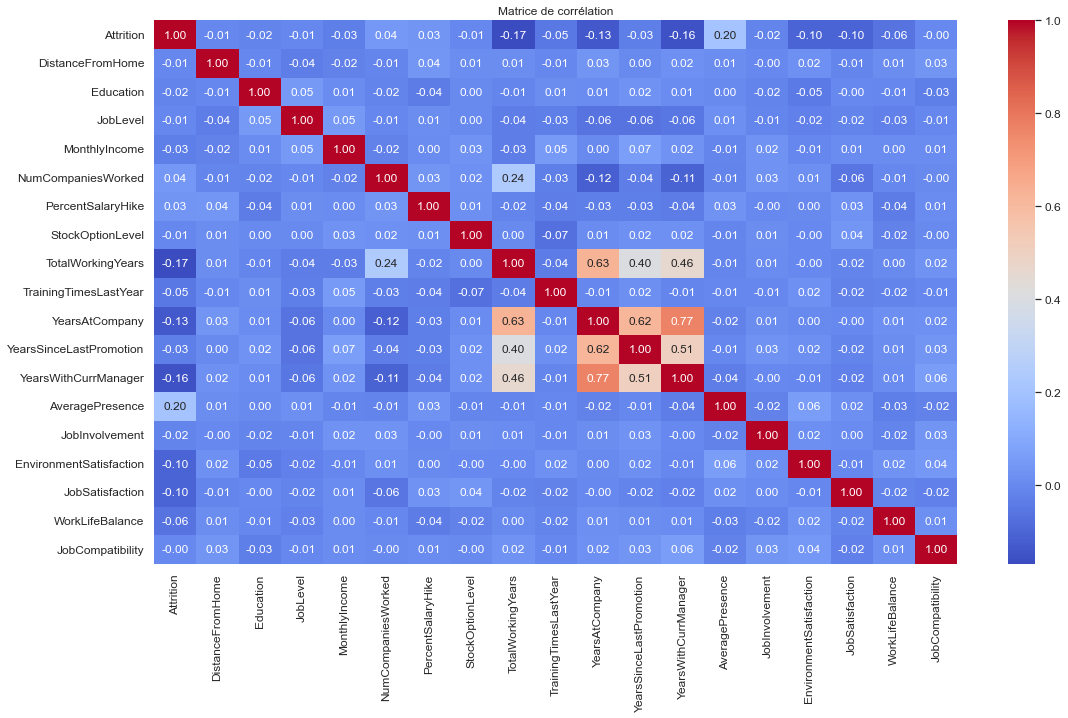

In [175]:

general_data_copy['Attrition'] = general_data_copy['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
correlation_matrix = general_data_copy.corr()
plt.figure(figsize=(18, 10))
sn.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matrice de corrélation')
plt.show()

## Prétraitement des Données et Préparation des Ensembles d'Entraînement/Validation/Test

Avant de plonger dans la modélisation, un prétraitement méticuleux des données est impératif pour assurer la qualité de l'information fournissant la base de notre analyse. Dans cette phase préparatoire, nous effectuons les opérations suivantes :

1. **Sélection des Caractéristiques** : Nous extrayons les caractéristiques pertinentes pour notre modèle en excluant la variable cible, 'Attrition', de notre ensemble de données.
2. **Identification des Types de Caractéristiques** : Nous distinguons les caractéristiques numériques et catégorielles, les premières étant sujettes à une imputation des valeurs manquantes et à une normalisation, et les secondes bénéficiant d'une transformation en variables indicatrices via l'encodage one-hot.
3. **Construction du Pipeline de Prétraitement** : Nous créons un `ColumnTransformer` qui applique les transformations appropriées aux types de données respectifs.

En suivant les principes de validation rigoureuse, nous subdivisons nos données en trois ensembles distincts :

- **Ensemble d'Entraînement** : Utilisé pour entraîner nos modèles.
- **Ensemble de Validation** : Employé pour l'ajustement fin des hyperparamètres et la validation intermédiaire des performances du modèle.
- **Ensemble de Test** : Réservé pour évaluer la performance finale du modèle, garantissant ainsi une estimation non biaisée de sa capacité de généralisation.

Cet agencement des ensembles de données est essentiel pour éviter le surajustement et garantir que notre modèle reste généralisable à de nouvelles données non vues. La répartition des données suit un ratio prédéterminé, préservant la distribution de la classe cible grâce à l'option `stratify`, ce qui est crucial dans le cas de déséquilibre des classes.

La distribution de la variable cible dans notre ensemble est la suivante :

```python
Y_Target.value_counts()


In [176]:
## PIPELINE
# ------------------------------------------------------------------------------

GeneralDataDF =general_data_copy.copy()

# 1) Data Cleaning and Preprocessing

X_Features = GeneralDataDF.drop('Attrition', axis=1)
Y_Target = GeneralDataDF['Attrition']


numerical_cols = X_Features.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = ['BusinessTravel', 'Department' , 'EducationField','JobRole']
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())]), numerical_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ])


# Division initiale des données en ensembles d'entraînement/test
X_train_val, X_test, Y_train_val, Y_test = train_test_split(X_Features, Y_Target, test_size=0.2, stratify=Y_Target, random_state=42)

# Division de l'ensemble d'entraînement pour créer un ensemble de validation
X_train, X_val, Y_train, Y_val = train_test_split(X_train_val, Y_train_val, test_size=0.25, stratify=Y_train_val, random_state=42) 


# Application du pretraitement
X_train_transformed = preprocessor.fit_transform(X_train)
X_val_transformed = preprocessor.transform(X_val)
X_test_transformed = preprocessor.transform(X_test)


Y_Target.value_counts()


0    3699
1     711
Name: Attrition, dtype: int64

In [177]:
from sklearn.metrics import roc_curve, auc


def plot_roc_curve_and_auc(model, X_test, y_test, model_name='Model'):
    """
    Trace la courbe ROC et calcule l'AUC pour un modèle donné et un ensemble de test.
    
    Paramètres :
    - model : le modèle de classification entraîné.
    - X_test : les caractéristiques de l'ensemble de test (après transformation, si nécessaire).
    - y_test : les étiquettes réelles de l'ensemble de test.
    - model_name : un nom descriptif pour le modèle (utilisé dans le titre du graphique).
    """
    # Prédiction des probabilités pour la classe positive
    y_scores = model.predict_proba(X_test)[:, 1]
    
    # Calcul des taux de vrais positifs et faux positifs
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    
    # Calcul de l'AUC
    roc_auc = auc(fpr, tpr)
    
    # Tracé de la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) - {model_name}')
    plt.legend(loc="lower right")
    plt.show()


## Nature du Problème et Sélection des Modèles

Notre investigation se concentre sur une question fondamentalement catégorielle : déterminer si un employé est susceptible ou non de quitter l'organisation. Cette tâche relève de la **classification binaire**, car la variable cible, l'attrition, est discrète, prenant deux états distincts. Dans cette optique, nous avons le choix entre divers algorithmes de classification. Chaque modèle apporte une perspective unique à l'analyse : de la **Régression Logistique**, qui estime la probabilité d'occurrence d'un événement en se basant sur une fonction logistique, au **Random Forest**, qui tire parti d'une multitude d'arbres de décision pour une robustesse accrue. Le modèle **SVM** offre une frontière de décision maximisée, tandis que l'**Arbre de Décision** fournit une interprétabilité précieuse. Notre choix s'alignera sur le modèle qui démontre la meilleure performance selon les métriques pertinentes, en visant à minimiser à la fois les faux positifs et les faux négatifs, compte tenu de l'impact significatif de ces erreurs dans le contexte organisationnel.


## Model : Regression logistique 

Validation Accuracy: 0.8503401360544217
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       740
           1       0.59      0.23      0.33       142

    accuracy                           0.85       882
   macro avg       0.73      0.60      0.62       882
weighted avg       0.82      0.85      0.82       882



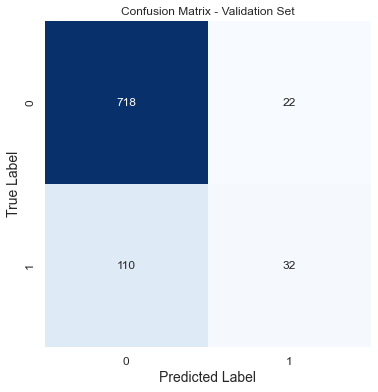

In [178]:
# Entraînement du modèle de régression logistique
lr_model = LogisticRegression(random_state=42, max_iter=500)
lr_model.fit(X_train_transformed, Y_train)

# Validation du modèle sur l'ensemble de validation
val_predictions = lr_model.predict(X_val_transformed)
print("Validation Accuracy:", accuracy_score(Y_val, val_predictions))
print(classification_report(Y_val, val_predictions))

# Visualisation de la matrice de confusion pour l'ensemble de validation
plt.figure(figsize=(6,6))
sn.heatmap(confusion_matrix(Y_val, val_predictions), annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Test Accuracy: 0.8514739229024944
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       740
           1       0.61      0.21      0.31       142

    accuracy                           0.85       882
   macro avg       0.74      0.59      0.62       882
weighted avg       0.82      0.85      0.82       882



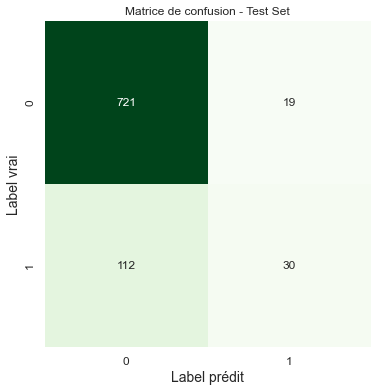

Cross Validation Mean Accuracy: 0.8537427922769373


In [179]:
# Évaluation du modèle sur l'ensemble de test
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score


test_predictions = lr_model.predict(X_test_transformed)
print("Test Accuracy:", accuracy_score(Y_test, test_predictions))
print(classification_report(Y_test, test_predictions))

# Visualisation de la matrice de confusion pour l'ensemble de test
plt.figure(figsize=(6,6))
sn.heatmap(confusion_matrix(Y_test, test_predictions), annot=True, fmt="d", cmap="Greens", square=True, cbar=False)
plt.title("Matrice de confusion - Test Set")
plt.xlabel("Label prédit")
plt.ylabel("Label vrai")
plt.show()

cv_scores_lr = cross_val_score(lr_model, np.vstack((X_train_transformed, X_val_transformed)), np.concatenate((Y_train, Y_val)), cv=5, scoring='accuracy')
print("Cross Validation Mean Accuracy:", cv_scores_lr.mean())
accuracy_lr = accuracy_score(Y_test, test_predictions)
precision_lr = precision_score(Y_test, test_predictions)
recall_lr = recall_score(Y_test, test_predictions)
f1_lr = f1_score(Y_test, test_predictions)
auc_lr = roc_auc_score(Y_test, lr_model.predict_proba(X_test_transformed)[:, 1])


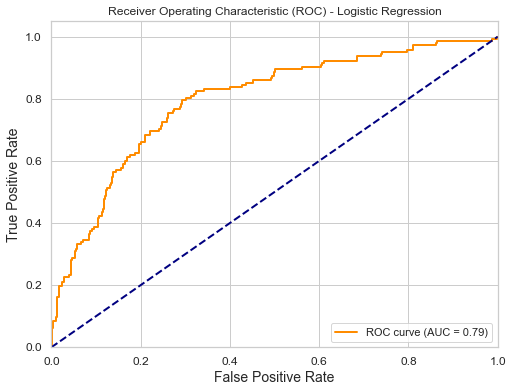

In [180]:
plot_roc_curve_and_auc(lr_model, X_test_transformed, Y_test, model_name='Logistic Regression')


## Model : Random forest

Entraînement et Validation du Modèle

Validation Accuracy: 0.9795918367346939
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       740
           1       0.99      0.88      0.93       142

    accuracy                           0.98       882
   macro avg       0.98      0.94      0.96       882
weighted avg       0.98      0.98      0.98       882



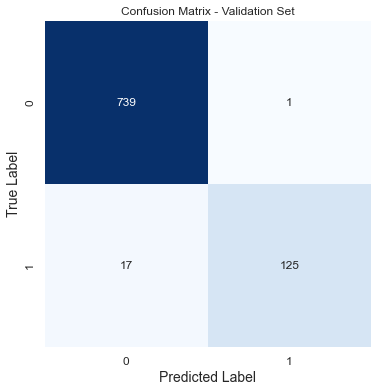

In [181]:
# Entraînement du modèle Random Forest
rf_model = RandomForestClassifier(random_state=42, n_jobs=-1)
rf_model.fit(X_train_transformed, Y_train)


val_predictions = rf_model.predict(X_val_transformed)
print("Validation Accuracy:", accuracy_score(Y_val, val_predictions))
print(classification_report(Y_val, val_predictions))


plt.figure(figsize=(6,6))
sn.heatmap(confusion_matrix(Y_val, val_predictions), annot=True, fmt="d", cmap="Blues", square=True, cbar=False)
plt.title("Confusion Matrix - Validation Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


Évaluation sur l'Ensemble de Test et Cross Validation

Test Accuracy: 0.9807256235827665
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       740
           1       0.98      0.89      0.94       142

    accuracy                           0.98       882
   macro avg       0.98      0.95      0.96       882
weighted avg       0.98      0.98      0.98       882



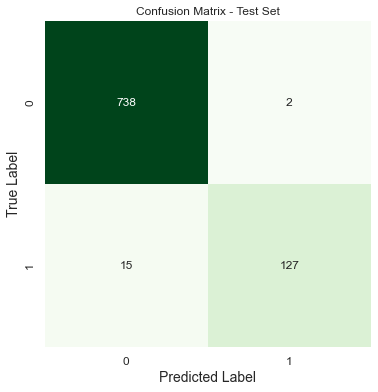

Cross Validation Mean Accuracy: 0.9861111111111109


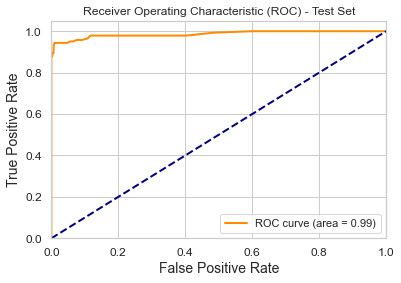

In [182]:
# Évaluation du modèle sur l'ensemble de test
test_predictions = rf_model.predict(X_test_transformed)
print("Test Accuracy:", accuracy_score(Y_test, test_predictions))
print(classification_report(Y_test, test_predictions))

# Visualisation de la matrice de confusion pour l'ensemble de test
plt.figure(figsize=(6,6))
sn.heatmap(confusion_matrix(Y_test, test_predictions), annot=True, fmt="d", cmap="Greens", square=True, cbar=False)
plt.title("Confusion Matrix - Test Set")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

# Cross Validation pour une évaluation robuste
cv_scores_rf = cross_val_score(rf_model, np.vstack((X_train_transformed, X_val_transformed)), np.concatenate((Y_train, Y_val)), cv=7, scoring='accuracy')
print("Cross Validation Mean Accuracy:", cv_scores_rf.mean())

# Calcul des taux de vrais positifs et faux positifs
fpr, tpr, thresholds = roc_curve(Y_test, rf_model.predict_proba(X_test_transformed)[:, 1])
roc_auc = auc(fpr, tpr)

# Tracé de la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Test Set')
plt.legend(loc="lower right")
plt.show()


accuracy_rf = accuracy_score(Y_test, test_predictions)
precision_rf = precision_score(Y_test, test_predictions)
recall_rf = recall_score(Y_test, test_predictions)
f1_rf = f1_score(Y_test, test_predictions)
auc_rf = roc_auc_score(Y_test, rf_model.predict_proba(X_test_transformed)[:, 1])

### Model SVM


In [183]:
from sklearn.svm import SVC

# Entraînement du modèle SVM
svm_model = SVC(probability=True, random_state=42)  # `probability=True` pour permettre l'utilisation de `predict_proba` pour la courbe ROC
svm_model.fit(X_train_transformed, Y_train)

# Validation du modèle sur l'ensemble de validation
val_predictions_svm = svm_model.predict(X_val_transformed)
print("Validation Accuracy:", accuracy_score(Y_val, val_predictions_svm))
print(classification_report(Y_val, val_predictions_svm))


Validation Accuracy: 0.9183673469387755
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       740
           1       0.96      0.51      0.67       142

    accuracy                           0.92       882
   macro avg       0.94      0.76      0.81       882
weighted avg       0.92      0.92      0.91       882



Test Accuracy: 0.9070294784580499
              precision    recall  f1-score   support

           0       0.91      0.99      0.95       740
           1       0.93      0.46      0.61       142

    accuracy                           0.91       882
   macro avg       0.92      0.73      0.78       882
weighted avg       0.91      0.91      0.89       882



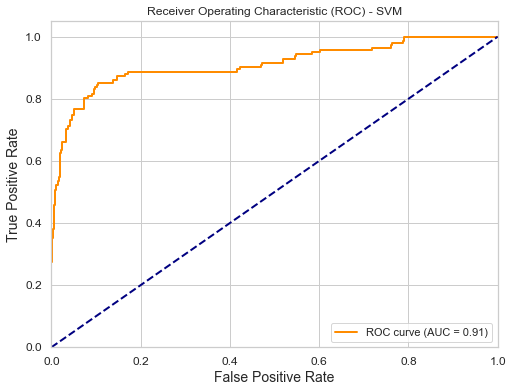

In [184]:
# Évaluation du modèle sur l'ensemble de test
test_predictions_svm = svm_model.predict(X_test_transformed)
print("Test Accuracy:", accuracy_score(Y_test, test_predictions_svm))
print(classification_report(Y_test, test_predictions_svm))
plot_roc_curve_and_auc(svm_model, X_test_transformed, Y_test, model_name='SVM')
accuracy_svm = accuracy_score(Y_test, test_predictions_svm)
precision_svm = precision_score(Y_test, test_predictions_svm)
recall_svm = recall_score(Y_test, test_predictions_svm)
f1_svm = f1_score(Y_test, test_predictions_svm)
auc_svm = roc_auc_score(Y_test, svm_model.predict_proba(X_test_transformed)[:, 1])

## Model Arbre de décision

In [185]:
from sklearn.tree import DecisionTreeClassifier

# Entraînement du modèle d'Arbre de Décision
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_transformed, Y_train)

# Validation du modèle sur l'ensemble de validation
val_predictions_dt = dt_model.predict(X_val_transformed)
print("Validation Accuracy:", accuracy_score(Y_val, val_predictions_dt))
print(classification_report(Y_val, val_predictions_dt))


Validation Accuracy: 0.9682539682539683
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       740
           1       0.93      0.87      0.90       142

    accuracy                           0.97       882
   macro avg       0.95      0.93      0.94       882
weighted avg       0.97      0.97      0.97       882



Test Accuracy: 0.9750566893424036
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       740
           1       0.95      0.89      0.92       142

    accuracy                           0.98       882
   macro avg       0.96      0.94      0.95       882
weighted avg       0.97      0.98      0.97       882



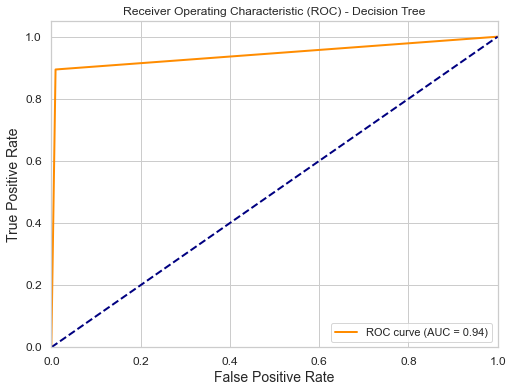

In [186]:
# Évaluation du modèle sur l'ensemble de test
test_predictions_dt = dt_model.predict(X_test_transformed)
print("Test Accuracy:", accuracy_score(Y_test, test_predictions_dt))
print(classification_report(Y_test, test_predictions_dt))
plot_roc_curve_and_auc(dt_model, X_test_transformed, Y_test, model_name='Decision Tree')


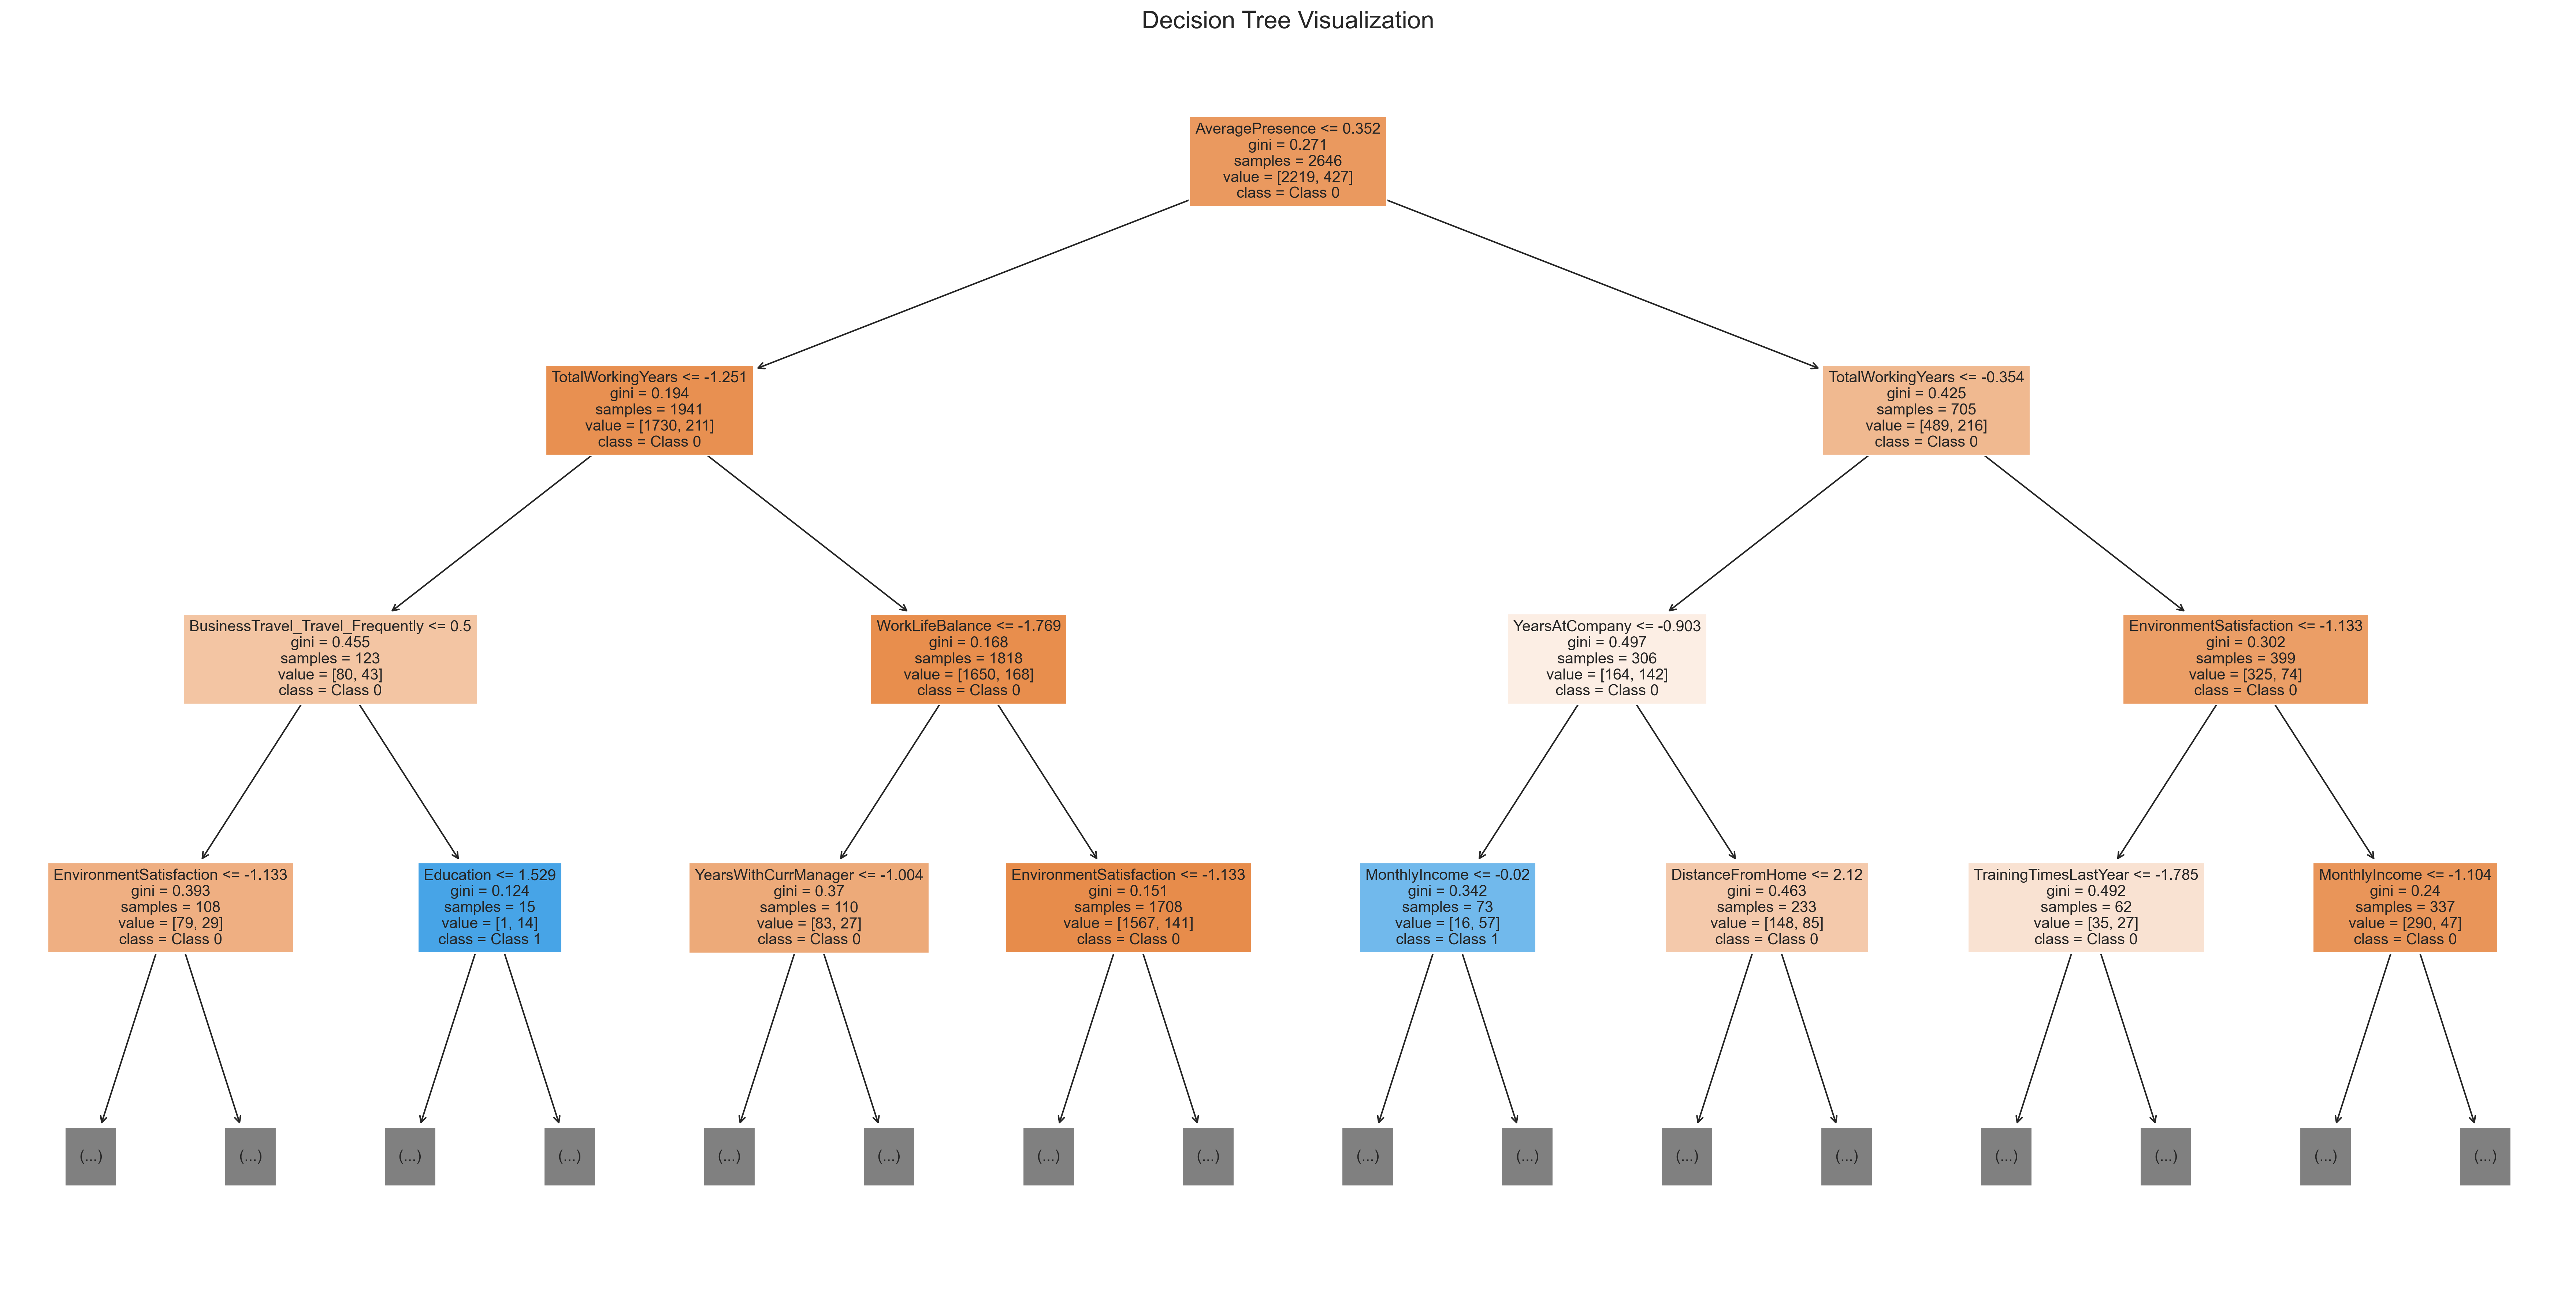

In [187]:

from sklearn.tree import plot_tree
num_features = numerical_cols.tolist() 
cat_features_transformer = preprocessor.named_transformers_['cat']
cat_features = cat_features_transformer.get_feature_names_out(categorical_cols)
all_features = num_features + cat_features.tolist()
plt.figure(figsize=(30, 15), dpi=300)  
plot_tree(dt_model, 
          filled=True, 
          feature_names=all_features, 
          class_names=['Class 0', 'Class 1'], 
          max_depth=3,
          fontsize=10)  
plt.title('Decision Tree Visualization', fontsize=16)
plt.show()
# Calcul des métriques pour l'arbre de décision
accuracy_dt = accuracy_score(Y_test, test_predictions_dt)
precision_dt = precision_score(Y_test, test_predictions_dt)
recall_dt = recall_score(Y_test, test_predictions_dt)
f1_dt = f1_score(Y_test, test_predictions_dt)
auc_dt = roc_auc_score(Y_test, dt_model.predict_proba(X_test_transformed)[:, 1])



### Pré selection

In [188]:
model_metrics = {
    'Model': ['Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree'],
    'Accuracy': [accuracy_lr, accuracy_rf, accuracy_svm, accuracy_dt],
    'Precision': [precision_lr, precision_rf, precision_svm, precision_dt],
    'Recall': [recall_lr, recall_rf, recall_svm, recall_dt],
    'F1 Score': [f1_lr, f1_rf, f1_svm, f1_dt],
    'AUC': [auc_lr, auc_rf, auc_svm, auc_dt]
}

performance_df = pd.DataFrame(model_metrics)
performance_df.head()



,Model,Accuracy,Precision,Recall,F1 Score,AUC
0,Logistic Regression,0.851474,0.612245,0.211268,0.314136,0.794433
1,Random Forest,0.980726,0.984496,0.894366,0.937269,0.986377
2,SVM,0.907029,0.928571,0.457746,0.613208,0.910820
3,Decision Tree,0.975057,0.947761,0.894366,0.920290,0.942453


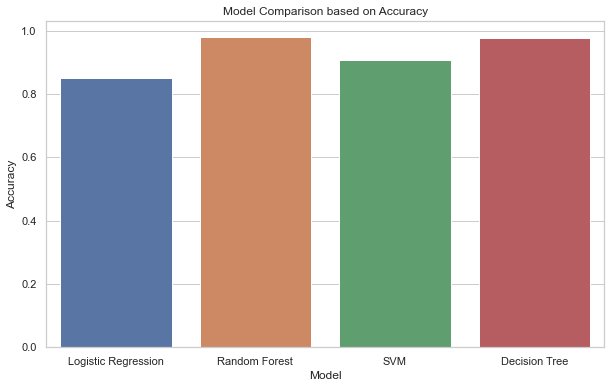

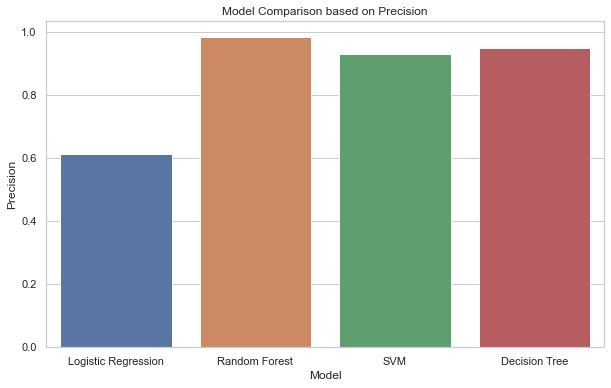

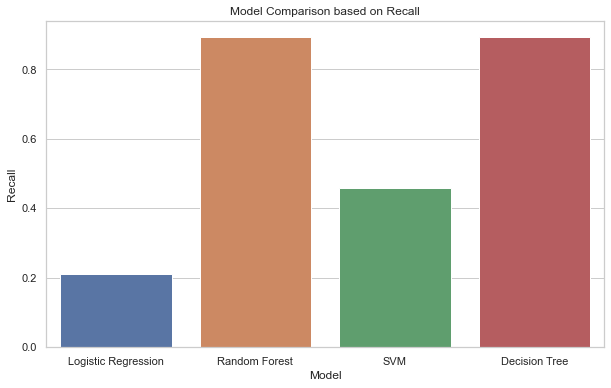

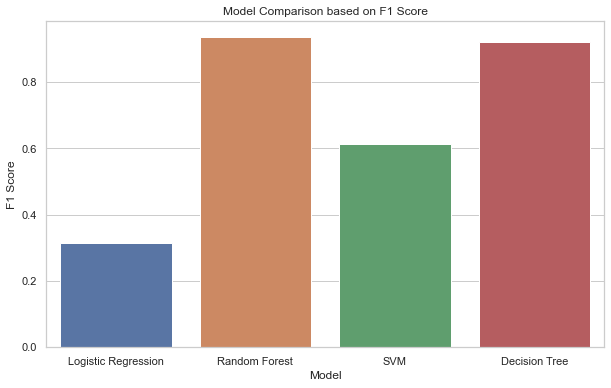

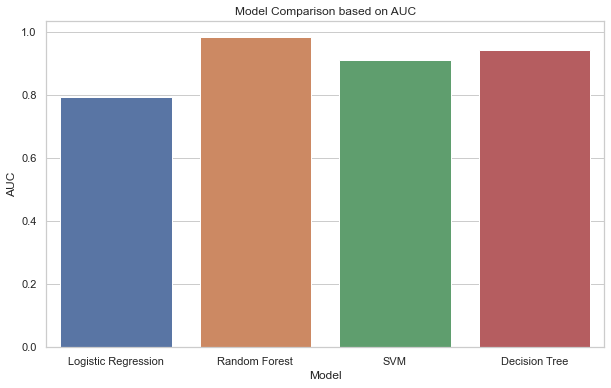

                 Model  Accuracy  Precision    Recall  F1 Score       AUC
1        Random Forest  0.980726   0.984496  0.894366  0.937269  0.986377
3        Decision Tree  0.975057   0.947761  0.894366  0.920290  0.942453
2                  SVM  0.907029   0.928571  0.457746  0.613208  0.910820
0  Logistic Regression  0.851474   0.612245  0.211268  0.314136  0.794433


In [189]:

sn.set_theme(style="whitegrid")

for metric in ['Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC']:
    plt.figure(figsize=(10, 6))
    sn.barplot(x='Model', y=metric, data=performance_df)
    plt.title(f'Model Comparison based on {metric}')
    plt.show()



performance_df.sort_values(by='AUC', ascending=False, inplace=True)
print(performance_df)


## Analyse Comparative des Modèles de Machine Learning

Nous avons entraîné quatre modèles de classification différents pour prédire la probabilité qu'un employé quitte l'entreprise, un problème crucial pour notre entreprise cliente. Voici les résultats obtenus pour chaque modèle :

- **Random Forest** : Avec une précision exceptionnelle de **98.07%**, une précision impressionnante de **98.45%**, et un taux de rappel de 89.44%, le modèle Random Forest se démarque clairement parmi les modèles testés. Son score **F1** de **93.73%** indique un excellent équilibre entre précision et rappel, ce qui est crucial dans notre contexte où les deux types d'erreurs ont des conséquences importantes. De plus, avec une **AUC** proche de la perfection à **98.64%**, ce modèle montre une capacité remarquable à distinguer entre les employés qui restent et ceux qui partent.

- **Decision Tree** : L'arbre de décision n'est pas loin derrière avec une précision globale de 97.51%. Il a démontré une précision de 94.78% et un rappel équivalent au Random Forest à 89.44%. Le score F1 de 92.03% est légèrement inférieur à celui du Random Forest, reflétant une légère baisse de l'équilibre entre la précision et le rappel. L'AUC de 94.25% reste robuste, bien que légèrement inférieur à celui du Random Forest, ce qui suggère une performance légèrement moindre dans la classification des probabilités.

- **SVM** : Le modèle SVM a montré une performance respectueuse avec une précision de 90.70%, mais sa précision de 92.86% est tempérée par un rappel plus modeste de 45.77%. Cela se traduit par un score F1 de 61.32%, indiquant que le modèle pourrait ne pas être aussi efficace pour identifier tous les employés à risque de départ. L'AUC de 91.08% indique que le modèle a une capacité raisonnable à distinguer les classes, bien que nettement inférieure à celle des modèles d'arbres.

- **Logistic Regression** : Enfin, la régression logistique a eu la performance la plus basse parmi les modèles testés, avec une précision de 85.15%, une précision de 61.22%, et un rappel de seulement 21.13%. Le score F1 de 31.41% suggère que ce modèle pourrait avoir du mal à maintenir un équilibre entre la précision et le rappel, ce qui est critique dans notre cas d'utilisation. Avec une AUC de 79.44%, la régression logistique présente une capacité nettement inférieure à distinguer entre les employés susceptibles de quitter et ceux qui restent.




### Amélioration du model préselectionné

In [190]:
from sklearn.model_selection import GridSearchCV

# Définition de la grille de recherche
param_grid = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           n_jobs=-1,
                           verbose=2,
                           scoring='roc_auc')  

grid_search.fit(X_train_transformed, Y_train)  


print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleure AUC obtenue : {grid_search.best_score_}")


best_rf_model = grid_search.best_estimator_
test_predictions = best_rf_model.predict(X_test_transformed)  # Utilisation des données de test transformées
print("Précision sur l'ensemble de test :", accuracy_score(Y_test, test_predictions))
print("AUC sur l'ensemble de test :", roc_auc_score(Y_test, best_rf_model.predict_proba(X_test_transformed)[:, 1]))
print(classification_report(Y_test, test_predictions))




Fitting 5 folds for each of 288 candidates, totalling 1440 fits
Meilleurs paramètres : {'bootstrap': False, 'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 400}
Meilleure AUC obtenue : 0.9845906068173333
Précision sur l'ensemble de test : 0.9841269841269841
AUC sur l'ensemble de test : 0.9947373429767796
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       740
           1       0.98      0.92      0.95       142

    accuracy                           0.98       882
   macro avg       0.98      0.96      0.97       882
weighted avg       0.98      0.98      0.98       882



In [191]:

accuracy_after = accuracy_score(Y_test, test_predictions)
precision_after = precision_score(Y_test, test_predictions)
f1_after = f1_score(Y_test, test_predictions)
recall_after = recall_score(Y_test, test_predictions)
auc_after =  roc_auc_score(Y_test, best_rf_model.predict_proba(X_test_transformed)[:, 1])
before_tuning = {
    'Accuracy': accuracy_rf,
    'Precision': precision_rf,
    'Recall': recall_rf,
    'F1 Score': f1_rf,
    'AUC': auc_rf
}

after_tuning = {
    'Accuracy':accuracy_after,
    'Precision': precision_after,
    'Recall': recall_after,
    'F1 Score': f1_after,
    'AUC':auc_after
}

improvements = {metric: after_tuning[metric] - before_tuning[metric] for metric in before_tuning}
df_improvements = pd.DataFrame(list(improvements.items()), columns=['Metric', 'Improvement'])
df_improvements['Before Tuning'] = df_improvements['Metric'].map(before_tuning)
df_improvements['After Tuning'] = df_improvements['Metric'].map(after_tuning)

print(df_improvements)


      Metric  Improvement  Before Tuning  After Tuning
0   Accuracy     0.003401       0.980726      0.984127
1  Precision     0.000352       0.984496      0.984848
2     Recall     0.021127       0.894366      0.915493
3   F1 Score     0.011636       0.937269      0.948905
4        AUC     0.008360       0.986377      0.994737


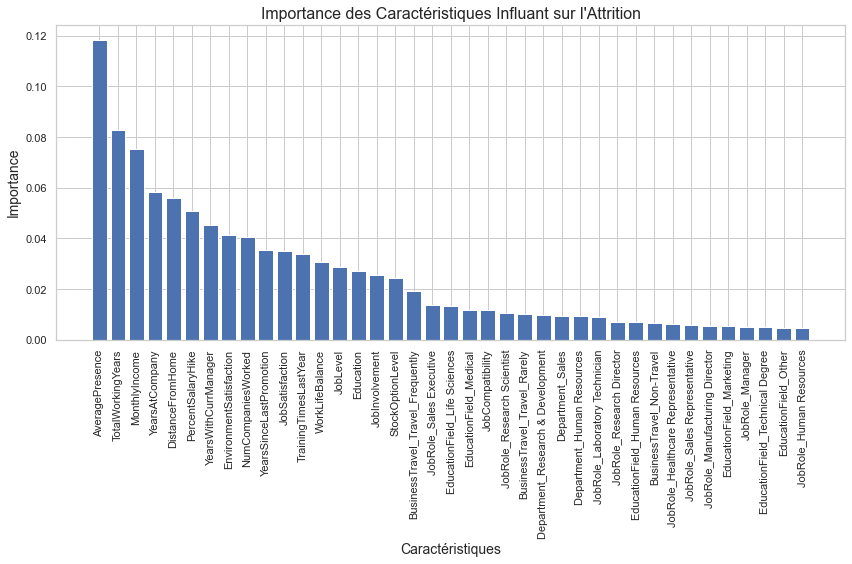

In [192]:

feature_importances = best_rf_model.feature_importances_
numeric_features = numerical_cols.tolist()
category_transformer = preprocessor.named_transformers_['cat']
category_features = category_transformer.get_feature_names_out(categorical_cols)
feature_names_transformed = numeric_features + category_features.tolist()
sorted_idx = np.argsort(feature_importances)[::-1]
plt.figure(figsize=(12, 8))
plt.title("Importance des Caractéristiques Influant sur l'Attrition", fontsize=16)
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align='center')
plt.xticks(range(len(feature_importances)), np.array(feature_names_transformed)[sorted_idx], rotation=90)
plt.ylabel("Importance", fontsize=14)
plt.xlabel("Caractéristiques", fontsize=14)
plt.tight_layout()
plt.show()


In [193]:

average_presence_quit = GeneralDataDF[GeneralDataDF['Attrition'] == 1]['AveragePresence'].mean()
average_presence_stay = GeneralDataDF[GeneralDataDF['Attrition'] == 0]['AveragePresence'].mean()

print(f"Moyenne de présence pour les employés qui ont quitté: {average_presence_quit}")
print(f"Moyenne de présence pour les employés restés: {average_presence_stay}")

average_income_quit = GeneralDataDF[GeneralDataDF['Attrition'] == 1]['MonthlyIncome'].mean()
average_income_stay = GeneralDataDF[GeneralDataDF['Attrition'] == 0]['MonthlyIncome'].mean()

print(f"Moyenne du revenu mensuel pour les employés qui ont quitté: {average_income_quit}")
print(f"Moyenne du revenu mensuel pour les employés restés: {average_income_stay}")


Moyenne de présence pour les employés qui ont quitté: 8.317264046656996
Moyenne de présence pour les employés restés: 7.582297116078793
Moyenne du revenu mensuel pour les employés qui ont quitté: 61682.61603375527
Moyenne du revenu mensuel pour les employés restés: 65672.59529602596


## Synthèse des Résultats et Recommandations

À travers notre analyse approfondie des données sur l'attrition des employés chez HumanForYou, nous avons identifié deux facteurs clés influençant le taux de rotation :

1. **Présence au travail** : Une présence moyenne plus élevée est associée à une augmentation de l'attrition, suggérant que le surmenage pourrait être un facteur de départ.

2. **Revenu mensuel** : Les employés qui quittent l'entreprise ont tendance à avoir un salaire moyen inférieur à ceux qui restent, ce qui met en lumière l'importance de la rémunération compétitive pour la rétention des employés.

### Choix de la Métrique

Pour mesurer l'efficacité de nos modèles prédictifs, la métrique choisie doit refléter l'équilibre entre la précision de la prédiction et la capacité à identifier tous les employés à risque. Le **score F1**, qui est la moyenne harmonique de la précision et du rappel, nous fournit une mesure équilibrée des performances du modèle, en tenant compte à la fois des faux positifs et des faux négatifs.

### Recommandations

Sur la base de nos analyses, nous recommandons les actions suivantes :

- **Initiative de bien-être** : Développer un programme de bien-être pour améliorer l'équilibre travail-vie privée et aborder les problèmes de surmenage.
- **Révision salariale** : Examiner et ajuster les structures salariales pour garantir l'équité et la compétitivité, en se concentrant sur les rôles avec un taux d'attrition élevé.

### Conclusion

En adoptant ces recommandations et en utilisant le score F1 pour évaluer nos modèles prédictifs, HumanForYou peut non seulement anticiper et gérer plus efficacement les risques d'attrition, mais également mettre en œuvre des stratégies ciblées pour améliorer la rétention des talents essentiels à la réussite de l'entreprise.

Notre modèle final, après fine-tuning, montre une performance exceptionnelle avec un score F1 élevé, indiquant une capacité fiable à identifier correctement les employés à risque tout en minimisant les fausses alertes. Cette prédiction précise et nuancée permettra à HumanForYou de se concentrer sur les interventions les plus pertinentes pour maintenir un environnement de travail satisfaisant et engagé.
